2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

# 1. Descriptive statistics about the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from scipy import stats
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Load train and test data without the Id column which is unnecessary

In [2]:
base = "challenge_data/"

In [3]:
train_data = pd.read_csv(base + "train.csv", index_col='Id')
test_data = pd.read_csv(base + "test.csv", index_col='Id')

In [4]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape

(1200, 80)

In [6]:
test_data.shape

(260, 79)

There are 1200 rows in the train dataset.
79 features are present in the file as well, along with the index and the sale price (81 columns).

In [7]:
train_data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1200.000000,1200,990.000000,1200.000000,1200,75,1200,1200,1200,1200,...,1200.000000,4,227,47,1200.000000,1200.000000,1200.000000,1200,1200,1200.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,3,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,946,NaN,NaN,1194,41,754,1079,1199,862,...,NaN,2,130,44,NaN,NaN,NaN,1036,979,NaN
mean,57.075000,NaN,70.086869,10559.411667,NaN,NaN,NaN,NaN,NaN,NaN,...,1.909167,NaN,NaN,NaN,40.453333,6.311667,2007.810833,NaN,NaN,181414.628333
std,42.682012,NaN,23.702029,10619.135549,NaN,NaN,NaN,NaN,NaN,NaN,...,33.148327,NaN,NaN,NaN,482.323444,2.673104,1.319027,NaN,NaN,81070.908544
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7560.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129900.000000
50%,50.000000,NaN,70.000000,9434.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163700.000000
75%,70.000000,NaN,80.000000,11616.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Let's describre more precisely the SalePrice feature

In [8]:
train_data['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 181414.63 and sigma = 81070.91



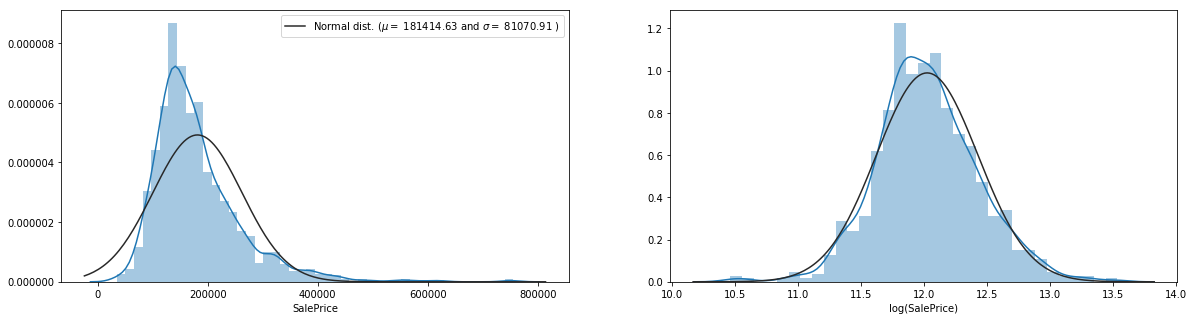

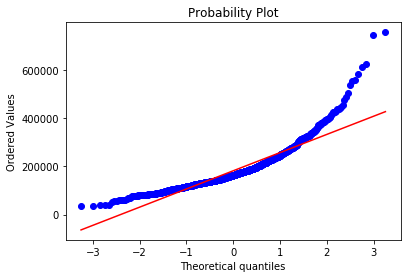

Skewness: 1.967215
Kurtosis: 7.033907


In [9]:
sale_price = train_data['SalePrice']
mu = sale_price.mean()
sigma = sale_price.std()
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.figure(figsize=[20,5])
plt.subplot(121)
sns.distplot(sale_price, fit=norm, kde=True)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('SalePrice')
plt.subplot(122)
sns.distplot(np.log(sale_price), fit=norm, kde=True)
plt.xlabel('log(SalePrice)')

fig = plt.figure()
res = stats.probplot(sale_price, plot=plt)
plt.show()

print("Skewness: %f" % sale_price.skew())
print("Kurtosis: %f" % sale_price.kurt())

We need to fix our data to be "normal" as possible. As we can see here, there is a very nice peak and the sale prices deviate from the normal distribution

## 1.2. Numerical features Vs Categorical features

In [10]:
train_data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [11]:
train_data.select_dtypes(include=[np.number]).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
train_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Let's tranform MSSubClass feature, because it's not numerical (cf description file).

In [13]:
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object') # conversion as object type

In [14]:
#Changing OverallCond, OverallQual into a categorical variable
train_data['OverallCond'] = train_data['OverallCond'].astype(str)
train_data['OverallQual'] = train_data['OverallQual'].astype(str)

#Year and month sold are transformed into categorical features.'YearBuilt', 'YearRemodAdd', GarageYrBlt

train_data['YearBuilt'] = train_data['YearBuilt'].astype(str)
train_data['YearRemodAdd'] = train_data['YearRemodAdd'].astype(str)
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype(str)


### 1.2.1. Vizualisation of numerical features

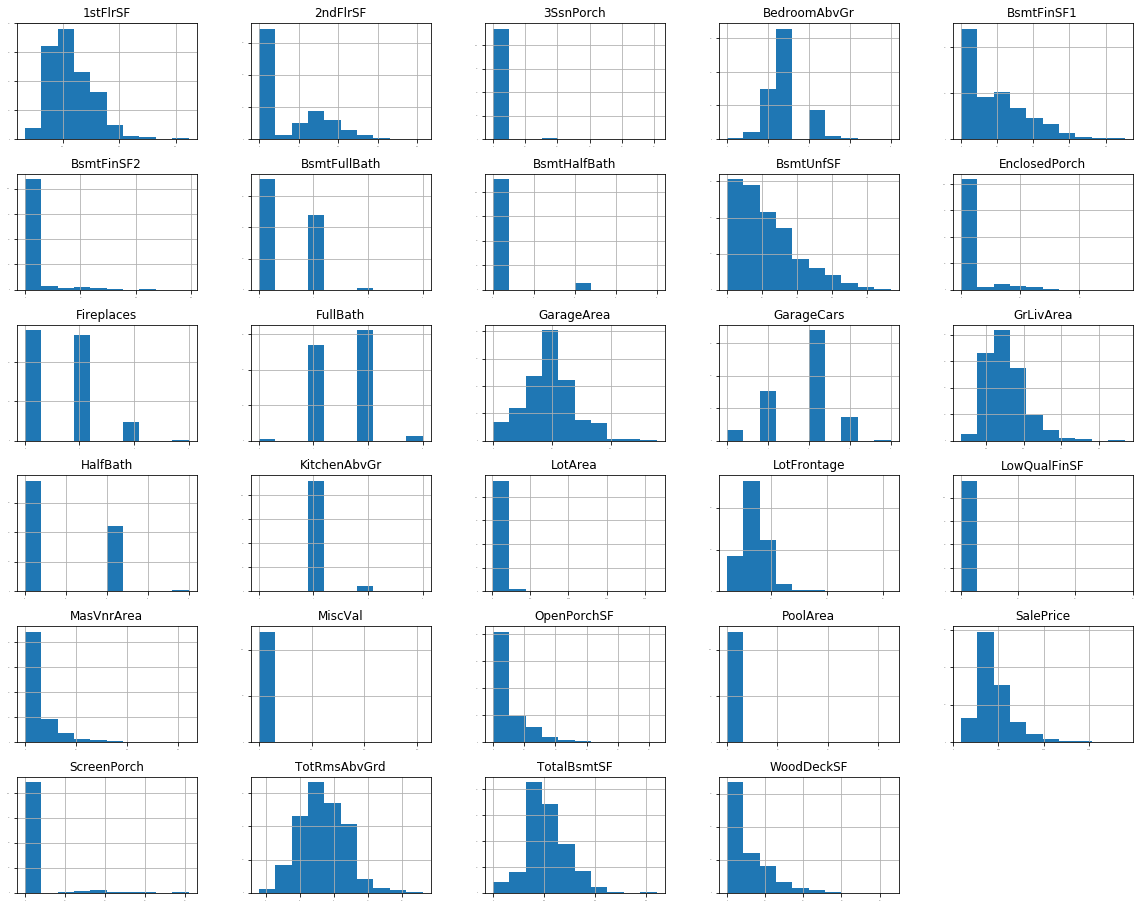

In [15]:
plt.subplots(figsize=(20,16))
ax=plt.subplot(111)
train_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,ax=ax)
plt.show()

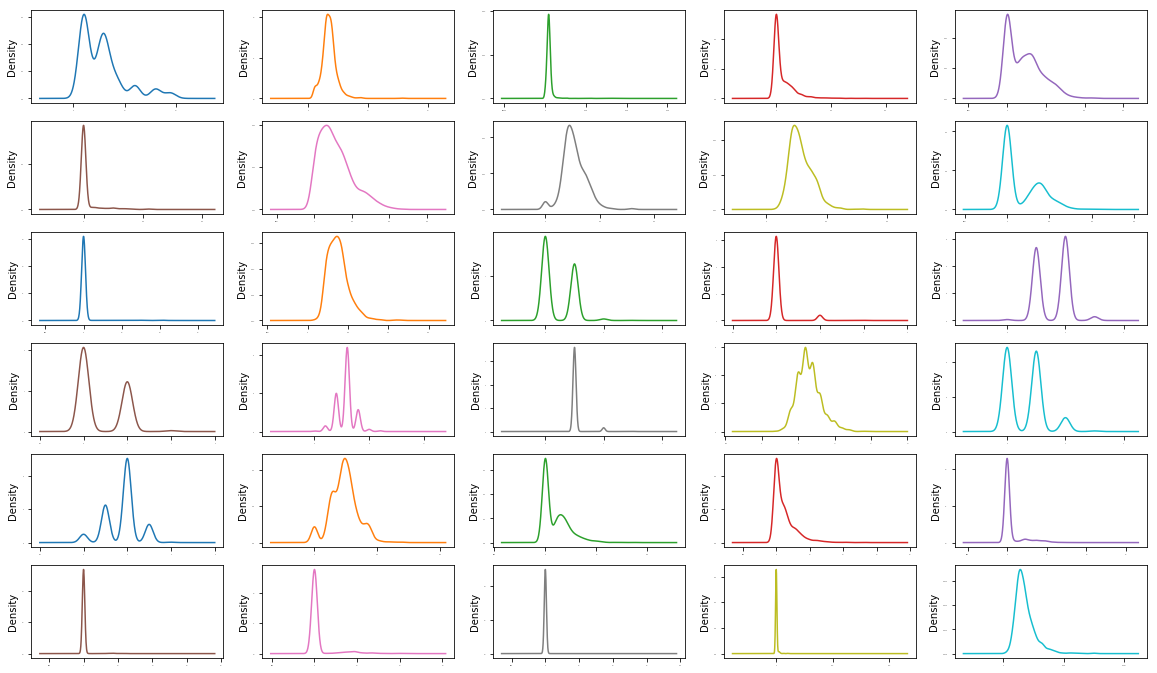

In [16]:
plt.subplots(figsize=(20,16))
ax=plt.subplot(111)
train_data.plot(kind='density', subplots=True, layout=(8,5), sharex=False, legend=False, fontsize=1, ax=ax)
plt.show()

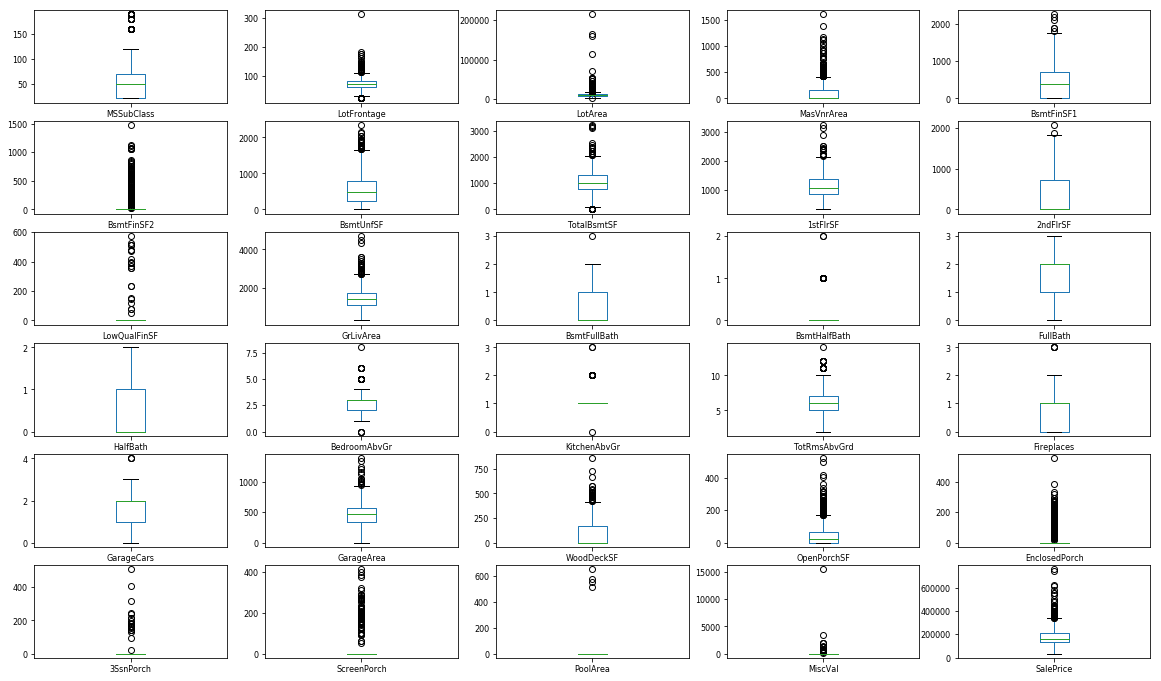

In [17]:
plt.subplots(figsize=(20,16))
ax=plt.subplot(111)
train_data.plot(kind='box', subplots=True, layout=(8,5), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

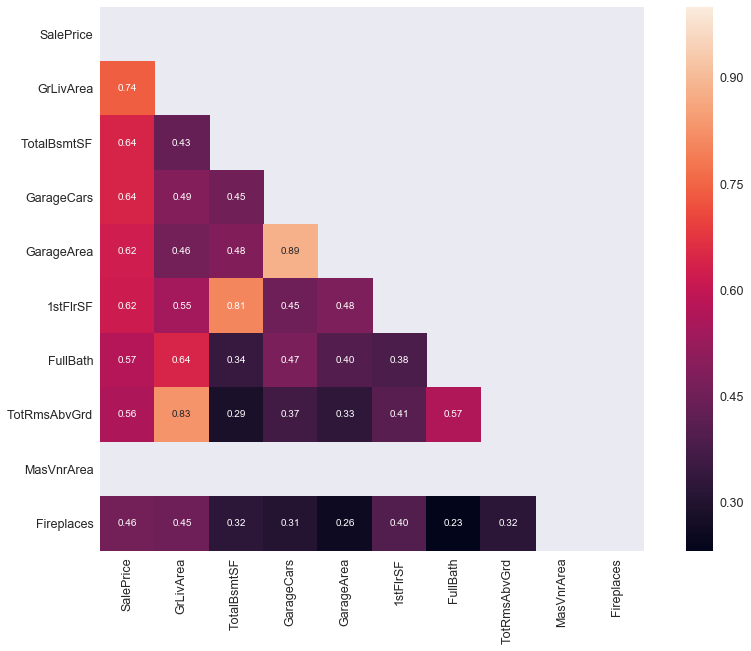

In [18]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15,10))
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

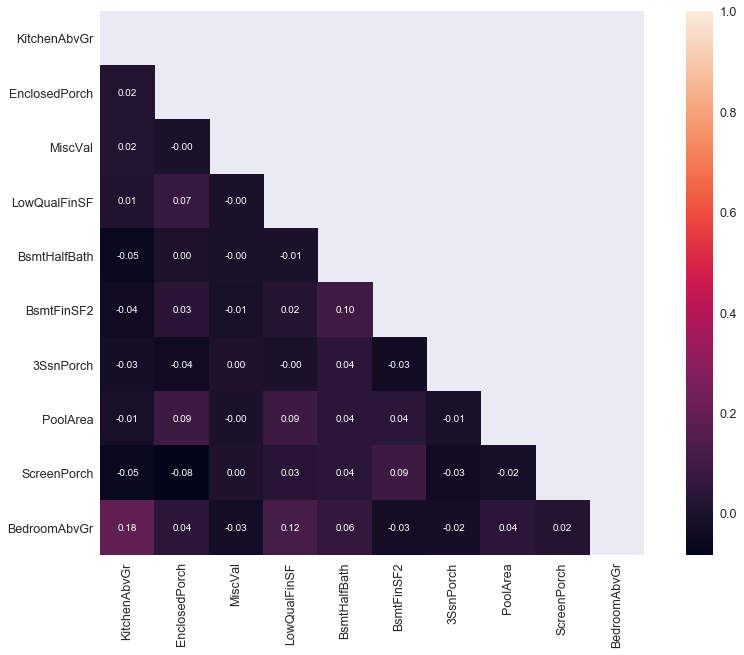

In [19]:
plt.figure(figsize=(15,10))
k = 10
cols_neg = corr_matrix.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols_neg].values.T)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, \
           yticklabels=cols_neg.values, xticklabels=cols_neg.values)
plt.show()

In [20]:
most_correlated_feature = pd.DataFrame(cols)
most_correlated_feature.columns = ['Most Positive Correlated Numerical Features']
most_correlated_feature

,Most Positive Correlated Numerical Features
0,SalePrice
1,GrLivArea
2,TotalBsmtSF
3,GarageCars
4,GarageArea
5,1stFlrSF
6,FullBath
7,TotRmsAbvGrd
8,MasVnrArea
9,Fireplaces


To recap, the description of top correlated features :

1. GrLivArea : Above grade (ground) living area square feet
2. TotalBsmtSF : Total square feet of basement area
3. GarageCars : Size of garage in car capacity
4. GarageArea : Size of garage in square feet
5. 1stFlrSF : First Floor square feet
6. FullBath : Full bathrooms above grade
7. TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
8. MasVnrArea : Masonry veneer area in square feet
9. Fireplaces : Number of fireplaces


Let's analyse more deeply at each features and how they relate to Sale Price.

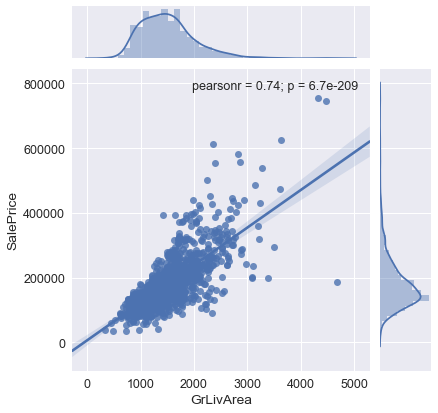

In [21]:
# GrLivArea vs Sale Price
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

Generally, the data follow the logic that people pay for more living area, except one datapoint (bottom right), we will remove these outlier manually.

In [22]:
# Removing outlier manually (one point in the bottom right)
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) 
                         & (train_data['SalePrice']<200000)].index).reset_index(drop=True)

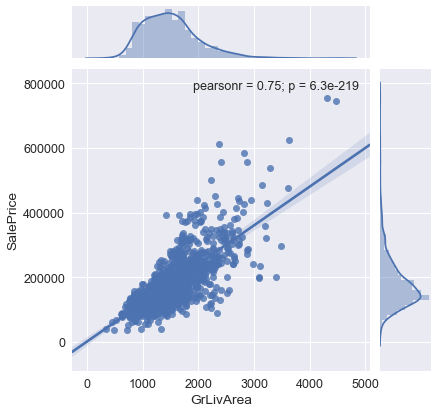

In [23]:
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')

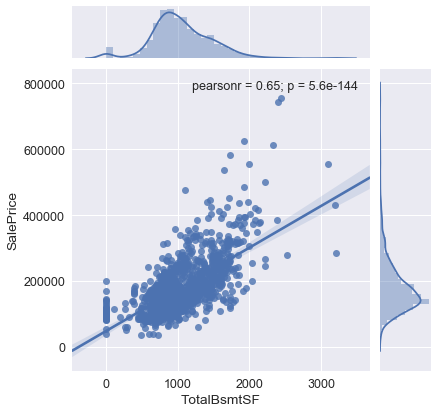

In [24]:
# TotalBsmtSF vs Sale Price
sns.jointplot(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'], kind='reg')

Nothing to report

In [25]:
train_data.shape

(1199, 80)

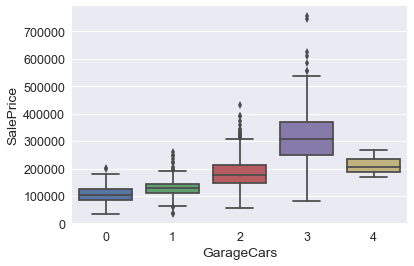

In [26]:
# GarageCars vs Sale Price
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

Something illogic: 4 garage cars and house cheaper. Let's remove those outliers

In [27]:
train_data.shape

(1199, 80)

In [28]:
train_data = train_data.drop(train_data[(train_data['GarageCars']>3) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

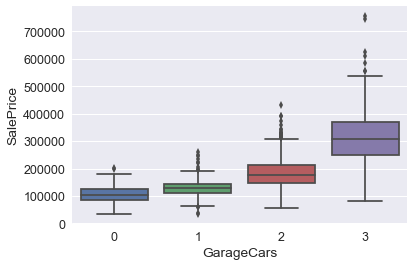

In [29]:
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

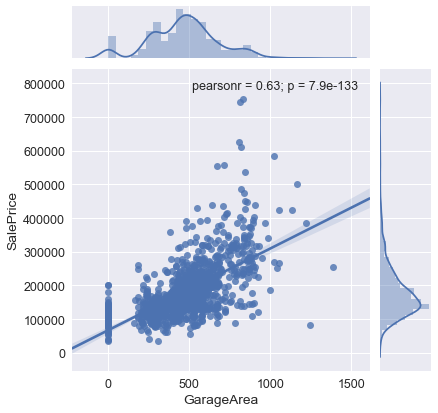

In [30]:
sns.jointplot(x=train_data['GarageArea'], y=train_data['SalePrice'], kind='reg')

In [31]:
train_data = train_data.drop(train_data[(train_data['GarageArea']>1000) 
                         & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

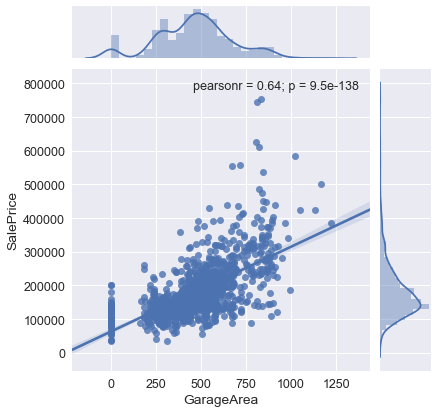

In [32]:
sns.jointplot(x=train_data['GarageArea'], y=train_data['SalePrice'], kind='reg')

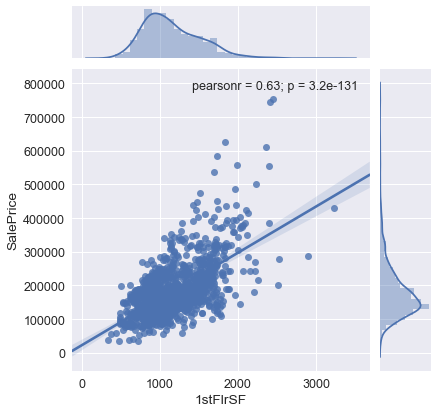

In [33]:
#1stFlrSF : First Floor square feet
sns.jointplot(x=train_data['1stFlrSF'], y=train_data['SalePrice'], kind='reg')

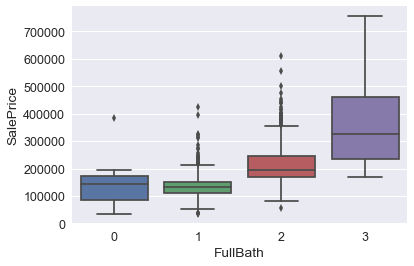

In [34]:
#FullBath : Full bathrooms above grade
sns.boxplot(x=train_data['FullBath'], y=train_data['SalePrice'])

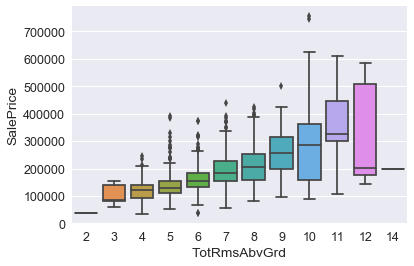

In [35]:
#TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
sns.boxplot(x=train_data['TotRmsAbvGrd'], y=train_data['SalePrice'])

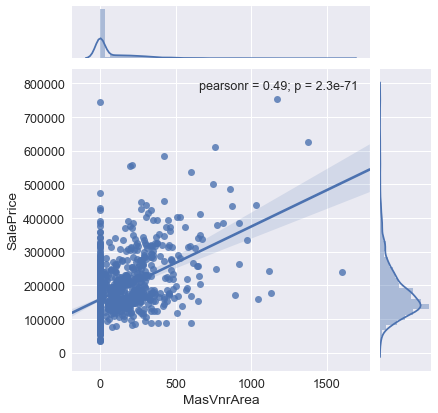

In [36]:
#MasVnrArea : Masonry veneer area in square feet
sns.jointplot(x=train_data['MasVnrArea'], y=train_data['SalePrice'], kind='reg')

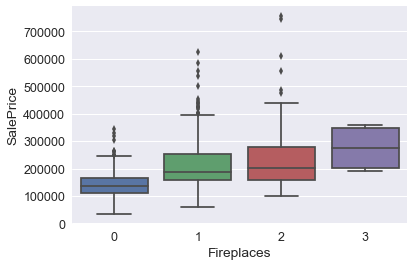

In [37]:
#Fireplaces : Number of fireplaces
sns.boxplot(x=train_data['Fireplaces'], y=train_data['SalePrice'])

### 1.2.2. Vizualisation of categorical features

Let's plot the year built in comparison with sale price 

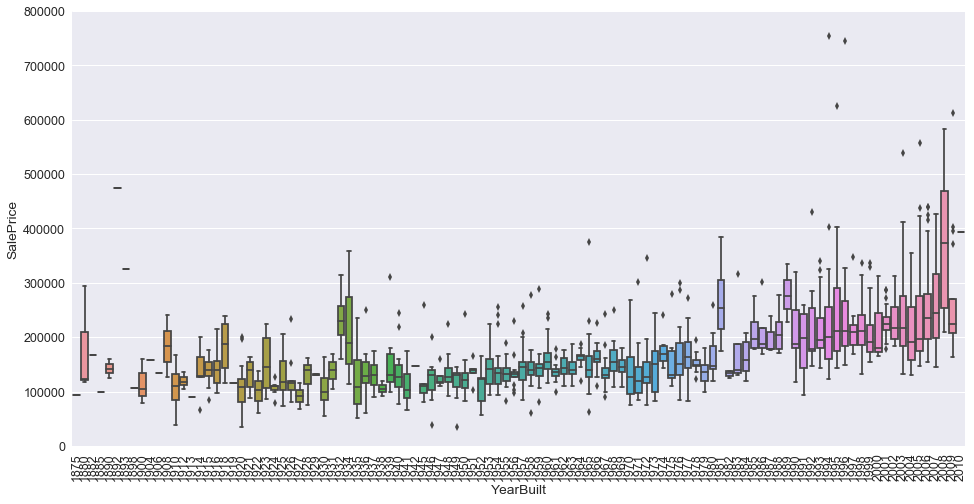

In [38]:
# YearBuilt vs Sale Price
data = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

a priori, the house prices decrease with age

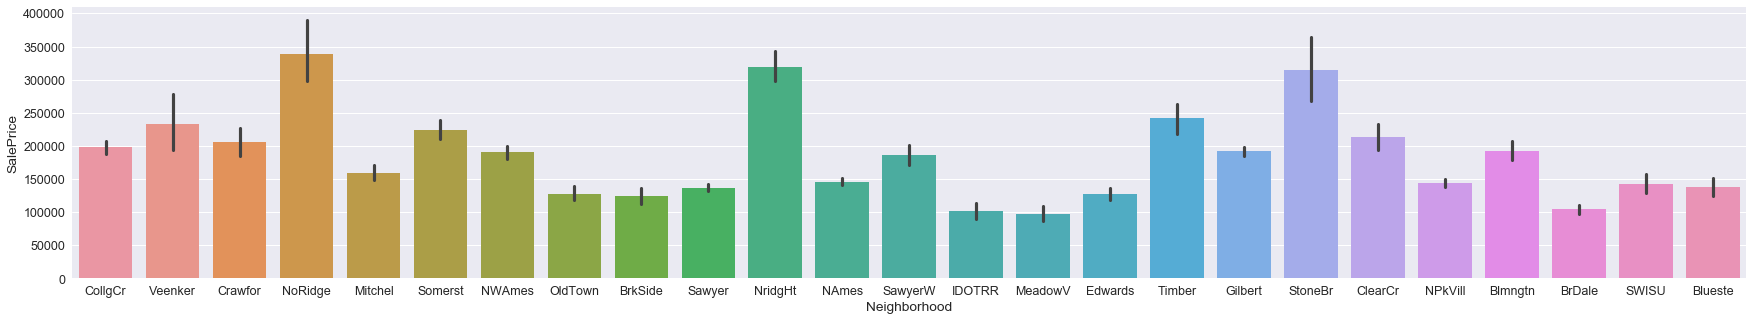

In [39]:
plt.subplots(figsize=(30,5))
sns.barplot(x='Neighborhood', y=train_data['SalePrice'], data=train_data)

# 2. Data cleaning and pre-processing

## 2.1. Pre-processing of numerical features

- normalisation?????
- standardisation????

In [40]:
# Find Missing Ratio of Dataset
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.664148
MiscFeature,96.137699
Alley,93.786734
Fence,80.940386
FireplaceQu,47.187238
LotFrontage,17.548279
GarageType,5.625525
GarageFinish,5.625525
GarageQual,5.625525
GarageCond,5.625525


Text(0.5,1,'Percent missing data by feature')

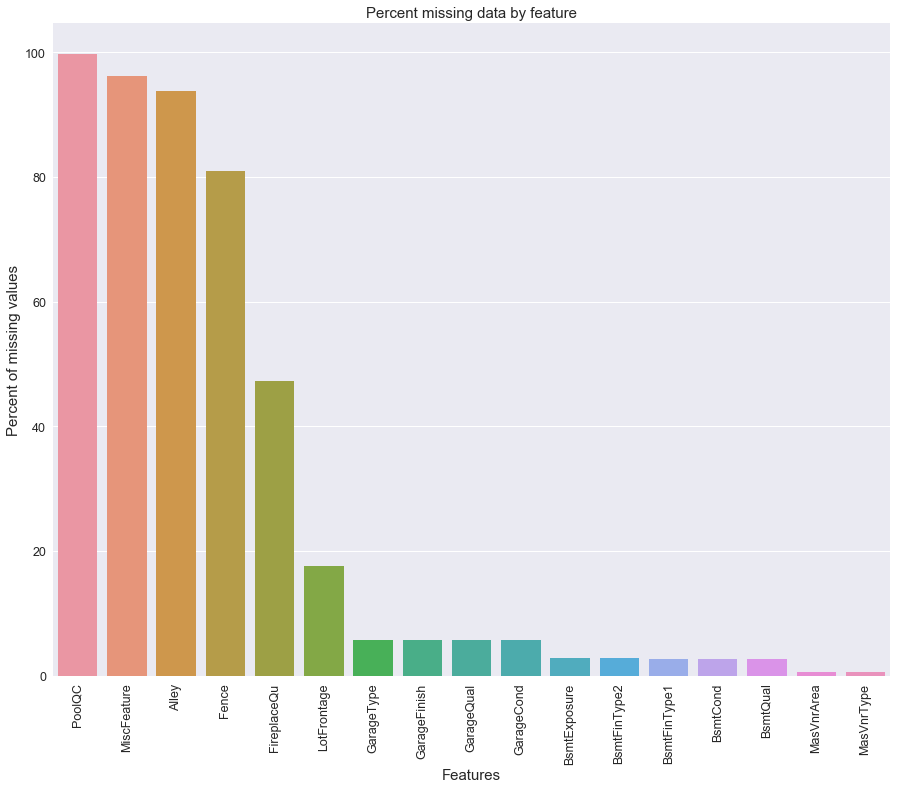

In [41]:
# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

By refereing to the content of the description document :

- PoolQC : NA means "No Pool"
- MiscFeature : NA means "no misc feature"
- Alley : NA means "no alley access"
- Fence : NA means "no fence"
- FireplaceQu : NA means "no fireplace"
- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
- GarageType, GarageFinish, GarageQual and GarageCond : We will replace all missing data with "None".
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means that there isn't a basement.
- MasVnrArea and MasVnrType : We can fill 0 for the area and None for the type.


In [42]:
train_data["PoolQC"] = train_data["PoolQC"].fillna("NoPool")
train_data["MiscFeature"] = train_data["MiscFeature"].fillna("None")
train_data["Alley"] = train_data["Alley"].fillna("None")
train_data["Fence"] = train_data["Fence"].fillna("None")
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("None")
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')

train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)


In [43]:
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio


In [44]:
train_data['KitchenQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
5       TA
6       Gd
7       TA
8       TA
9       TA
10      TA
11      Ex
12      TA
13      Gd
14      TA
15      TA
16      TA
17      TA
18      Gd
19      TA
20      Gd
21      Gd
22      Gd
23      TA
24      Gd
25      Gd
26      Gd
27      Gd
28      TA
29      Fa
        ..
1161    Gd
1162    TA
1163    TA
1164    Gd
1165    Ex
1166    TA
1167    Gd
1168    TA
1169    TA
1170    TA
1171    TA
1172    TA
1173    Gd
1174    Ex
1175    TA
1176    TA
1177    TA
1178    TA
1179    Gd
1180    Gd
1181    Gd
1182    Gd
1183    Gd
1184    TA
1185    TA
1186    Gd
1187    Gd
1188    TA
1189    Gd
1190    TA
Name: KitchenQual, Length: 1191, dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
print('Shape all_data: {}'.format(train_data.shape))

Shape all_data: (1191, 80)


In [46]:
train_data['KitchenQual']

0       2
1       3
2       2
3       2
4       2
5       3
6       2
7       3
8       3
9       3
10      3
11      0
12      3
13      2
14      3
15      3
16      3
17      3
18      2
19      3
20      2
21      2
22      2
23      3
24      2
25      2
26      2
27      2
28      3
29      1
       ..
1161    2
1162    3
1163    3
1164    2
1165    0
1166    3
1167    2
1168    3
1169    3
1170    3
1171    3
1172    3
1173    2
1174    0
1175    3
1176    3
1177    3
1178    3
1179    2
1180    2
1181    2
1182    2
1183    2
1184    3
1185    3
1186    2
1187    2
1188    3
1189    2
1190    3
Name: KitchenQual, Length: 1191, dtype: int64

In [47]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,RL,65.0,8450,1,1,3,Lvl,AllPub,Inside,...,0,3,4,None,0,4,2,WD,Normal,208500
1,0,RL,80.0,9600,1,1,3,Lvl,AllPub,FR2,...,0,3,4,None,0,7,1,WD,Normal,181500
2,5,RL,68.0,11250,1,1,0,Lvl,AllPub,Inside,...,0,3,4,None,0,11,2,WD,Normal,223500
3,6,RL,60.0,9550,1,1,0,Lvl,AllPub,Corner,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,5,RL,84.0,14260,1,1,0,Lvl,AllPub,FR2,...,0,3,4,None,0,3,2,WD,Normal,250000


In [48]:
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index

skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,27.977163
PoolArea,17.362289
LotArea,12.253777
3SsnPorch,10.070186
LowQualFinSF,8.473778


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_data[feat] = boxcox1p(train_data[feat], lam)
    train_data[feat] += 1

There are 55 skewed numerical features to Box Cox transform


In [50]:
train_data.shape

(1191, 80)

In [51]:
train_data = pd.get_dummies(train_data)

In [52]:
train_data.shape

(1191, 485)

In [53]:
X = train_data.iloc[:, train_data.columns != 'SalePrice']
y = train_data['SalePrice']

In [54]:
validation_size = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=0)

In [55]:
X_train.shape

(952, 484)

In [56]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [57]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [58]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.7940 (0.0548)

ElasticNet score: 0.7981 (0.0550)

Kernel Ridge score: 0.7535 (0.0591)

Gradient Boosting score: 0.7491 (0.0566)

Xgboost score: 0.7809 (0.0717)

LGBM score: 0.7734 (0.0439)



In [ ]:
import statsmodels.formula.api as sm


# 3. Defining a modeling approach to the problem

Rappel de nos 2 datasets
- numerical_train_data_df
- new_categorical_features

## Build such a statistical model

## Validate the outcome of the model